# Study of Gaussians in Gaussian wells

In this notebook we'll explore a one-dimensional system described by the single-particle Hamiltonian
\begin{align}
    \hat{h}
    = -\frac{\hbar^2}{2m} \frac{\text{d}^2}{\text{d}x^2}
    - \sum_{i} w_i (\hat{x} - C_i)^k \text{exp}\!\left(-c_i (\hat{x} - C_i)^2\right),
\end{align}
where $\Re(c_i) > 0$, $C_i \in \mathbb{R}$ is the center of well $i$, $w_i > 0$ the weight of well $i$.
We'll compare the results when using the Gaussian-code with the results from finite differences using `quantum-systems`.

In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

from quantum_systems import ODQD, BasisSet

from gaussians import G1D
from gaussians.one_dim import (
    construct_kinetic_matrix_elements,
    construct_overlap_matrix_elements,
    construct_gaussian_operator_matrix_elements,
)

<IPython.core.display.Javascript object>

## Single central well

We'll start of using a single well centered in the origin.
The Hamiltonian is then given by
\begin{align}
    \hat{h} = \hat{t} - w \text{exp}\!\left(-c \hat{x}^2 \right).
\end{align}
The purpose of this is to determine how well Gaussian orbitals compare to the single-particle eigenstates from finite differences.

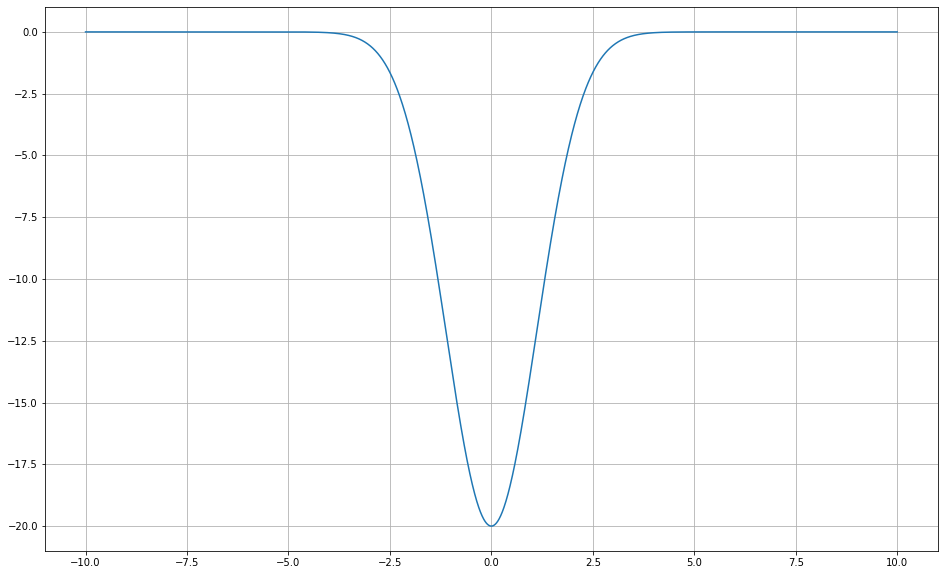

<IPython.core.display.Javascript object>

In [45]:
k = 0
C = 0
c = 0.4
weight = 20

well = G1D(k, c, C)
potential = lambda x: -weight * well(x)

grid_length = 10
num_grid_points = 2001

grid = np.linspace(-grid_length, grid_length, num_grid_points)

fig = plt.figure(figsize=(16, 10))
plt.plot(grid, potential(grid))
plt.grid()
plt.show()

### Setting up the finite-differences basis

In [5]:
l = 6

odqd = ODQD(l, grid_length, num_grid_points, potential=potential)

<IPython.core.display.Javascript object>

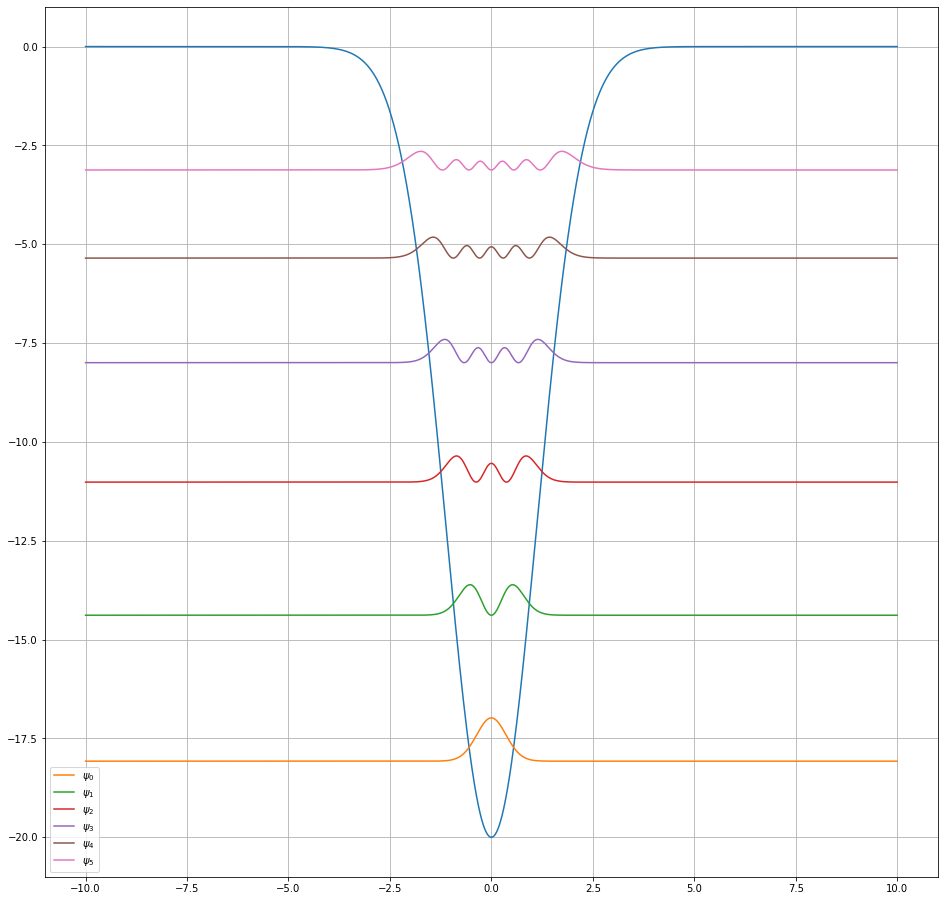

<IPython.core.display.Javascript object>

In [6]:
fig = plt.figure(figsize=(16, 16))

plt.plot(odqd.grid, potential(odqd.grid))

for i in range(odqd.l):
    plt.plot(
        odqd.grid,
        np.abs(odqd.spf[i]) ** 2 + odqd.h[i, i].real,
        label=r"$\psi_{" + f"{i}" + r"}$",
    )

plt.grid()
plt.legend()
plt.show()

In [22]:
print(np.diag(odqd.h).real)

[-18.07532374 -14.3835743  -11.01647268  -7.99569963  -5.35019939
  -3.1212969 ]


<IPython.core.display.Javascript object>

### Setting up the Gaussian basis

In [34]:
gaussians = [G1D(i, np.sqrt(c)) for i in range(l)]

t = construct_kinetic_matrix_elements(gaussians)
s = construct_overlap_matrix_elements(gaussians)
v = weight * construct_gaussian_operator_matrix_elements(well, gaussians)

bs = BasisSet(len(gaussians), dim=1)
bs.s = s
bs.h = t + v
bs.grid = grid
bs.u = np.zeros((bs.l, bs.l, bs.l, bs.l))
bs.spf = np.asarray([g(bs.grid, with_norm=True) for g in gaussians])

<IPython.core.display.Javascript object>

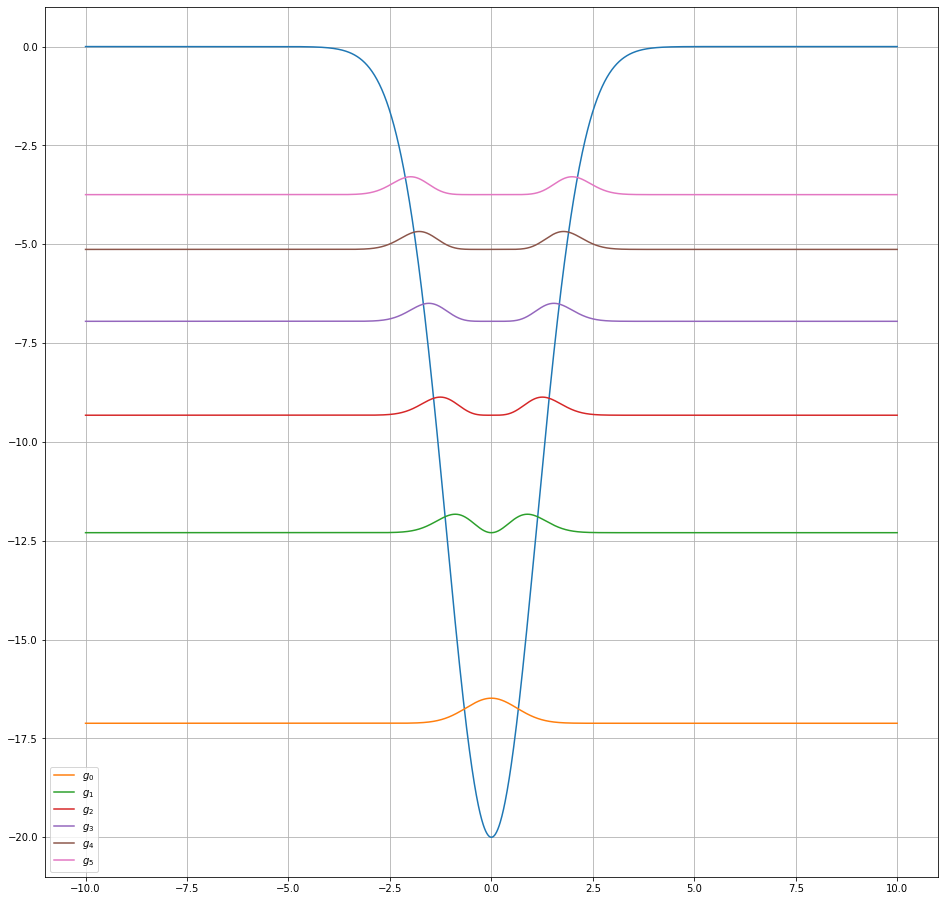

<IPython.core.display.Javascript object>

In [39]:
fig = plt.figure(figsize=(16, 16))

plt.plot(bs.grid, potential(bs.grid))

for i in range(bs.l):
    plt.plot(
        bs.grid,
        np.abs(bs.spf[i]) ** 2 + bs.h[i, i].real,
        label=r"$g_{" + f"{i}" + r"}$",
    )

plt.grid()
plt.legend()
plt.show()

### Diagonalized Gaussian basis

In [36]:
eps, C = scipy.linalg.eigh(bs.h, bs.s)

bs_2 = bs.copy_basis()
bs_2.change_basis(C)

<IPython.core.display.Javascript object>

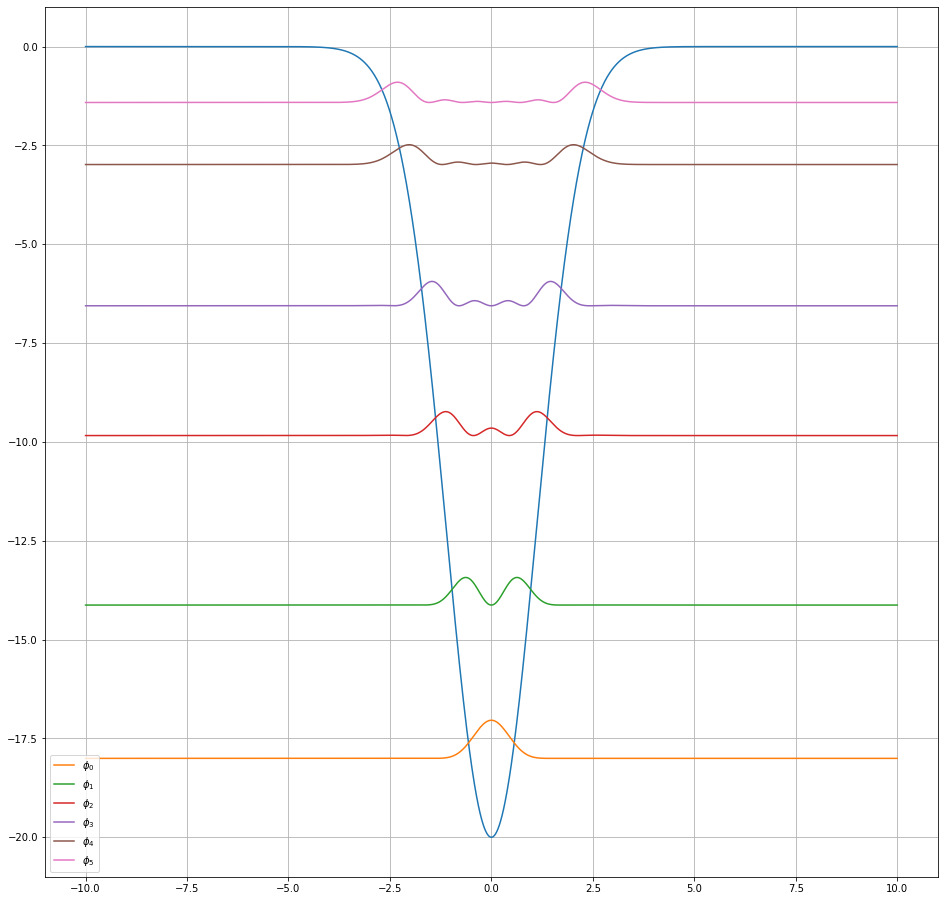

<IPython.core.display.Javascript object>

In [40]:
fig = plt.figure(figsize=(16, 16))

plt.plot(bs_2.grid, potential(bs_2.grid))

for i in range(bs_2.l):
    plt.plot(
        bs_2.grid,
        np.abs(bs_2.spf[i]) ** 2 + bs_2.h[i, i].real,
        label=r"$\phi_{" + f"{i}" + r"}$",
    )

plt.grid()
plt.legend()
plt.show()

In [38]:
print(np.diag(bs_2.h).real)

[-18.00438552 -14.12661436  -9.83920189  -6.5564884   -2.98364648
  -1.41403666]


<IPython.core.display.Javascript object>

### Comparison

We compare the finite differences solution to the diagonlized Gaussian basis.

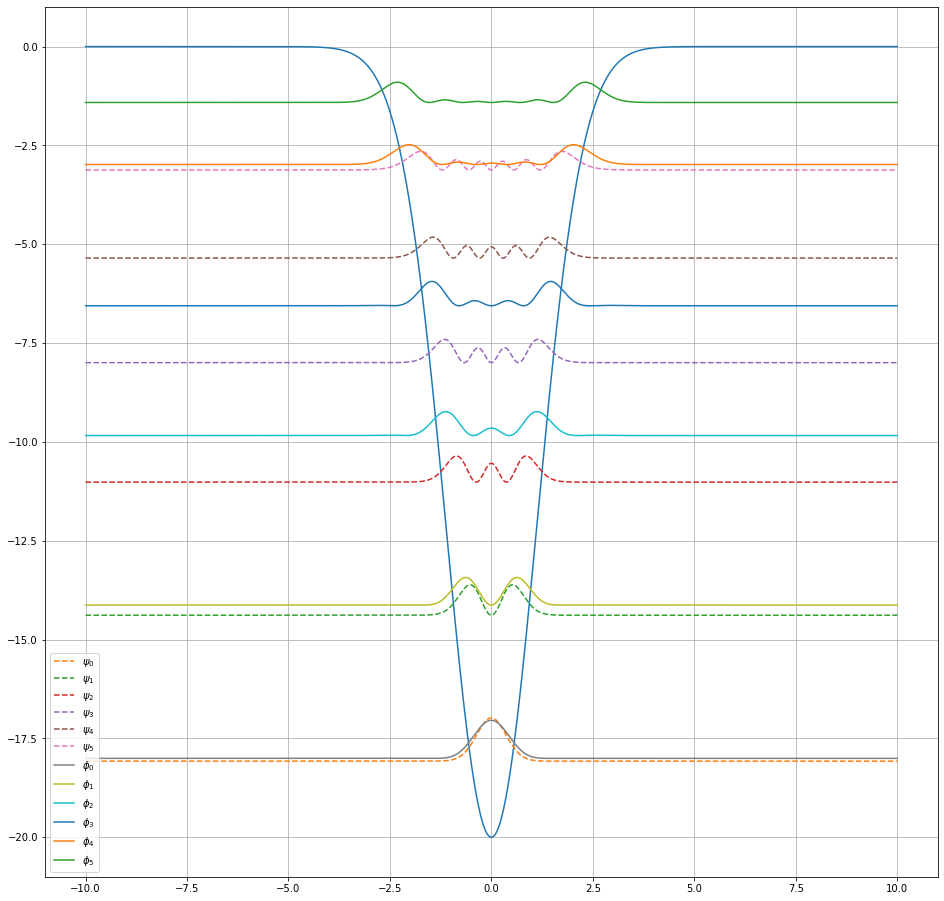

<IPython.core.display.Javascript object>

In [42]:
fig = plt.figure(figsize=(16, 16))

plt.plot(bs_2.grid, potential(bs_2.grid))

for i in range(odqd.l):
    plt.plot(
        odqd.grid,
        np.abs(odqd.spf[i]) ** 2 + odqd.h[i, i].real,
        "--",
        label=r"$\psi_{" + f"{i}" + r"}$",
    )

for i in range(bs_2.l):
    plt.plot(
        bs_2.grid,
        np.abs(bs_2.spf[i]) ** 2 + bs_2.h[i, i].real,
        label=r"$\phi_{" + f"{i}" + r"}$",
    )

plt.grid()
plt.legend()
plt.show()

## Double-well

We now proceed to look at a system in a symmetric double well.
There are two possible shapes for the double well.
We can either place two $s$-Gaussian wells on two different centers, or we can create a $d$-Gaussian at the origin.
The one-body Hamiltonian with two $s$-Gaussians is thus on the form
\begin{align}
    \hat{h}
    = \hat{t} - w \text{exp}\!\left(-c x^2_L\right) - w \text{exp}\!\left(-c x^2_R\right),
\end{align}
where $x_L = x - L$ and $x_R = x - R$ for the left and the right centers.
For a $d$-Gaussian we can write the Hamiltonian as
\begin{align}
    \hat{h}
    = \hat{t} - w x^2 \text{exp}\!\left(-c x^2\right).
\end{align}

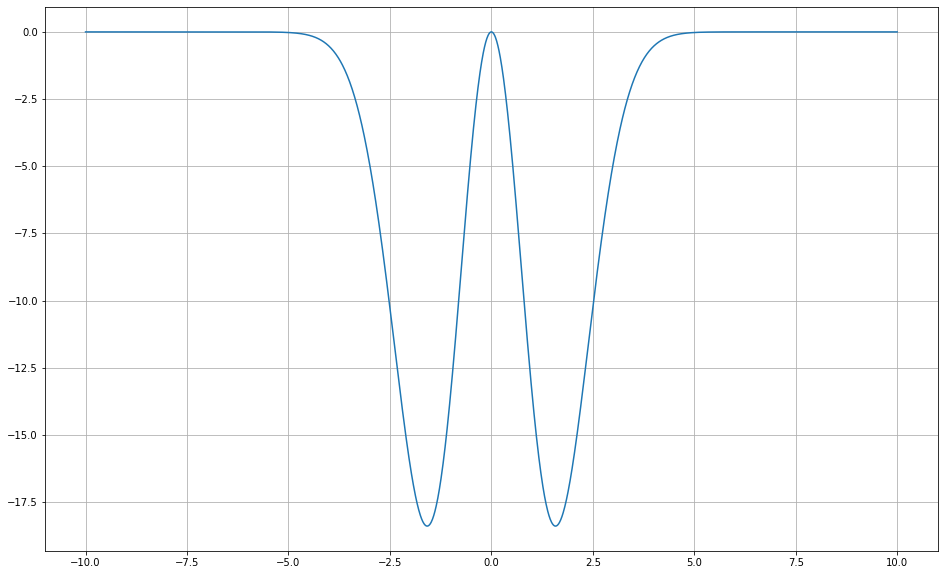

<IPython.core.display.Javascript object>

In [54]:
# Demonstration of a double-well using a single d-Gaussian
k = 2
C = 0
c = 0.4
weight = 20

well = G1D(k, c, C)
potential = lambda x: -weight * well(x)

grid_length = 10
num_grid_points = 2001

grid = np.linspace(-grid_length, grid_length, num_grid_points)

fig = plt.figure(figsize=(16, 10))
plt.plot(grid, potential(grid))
plt.grid()
plt.show()

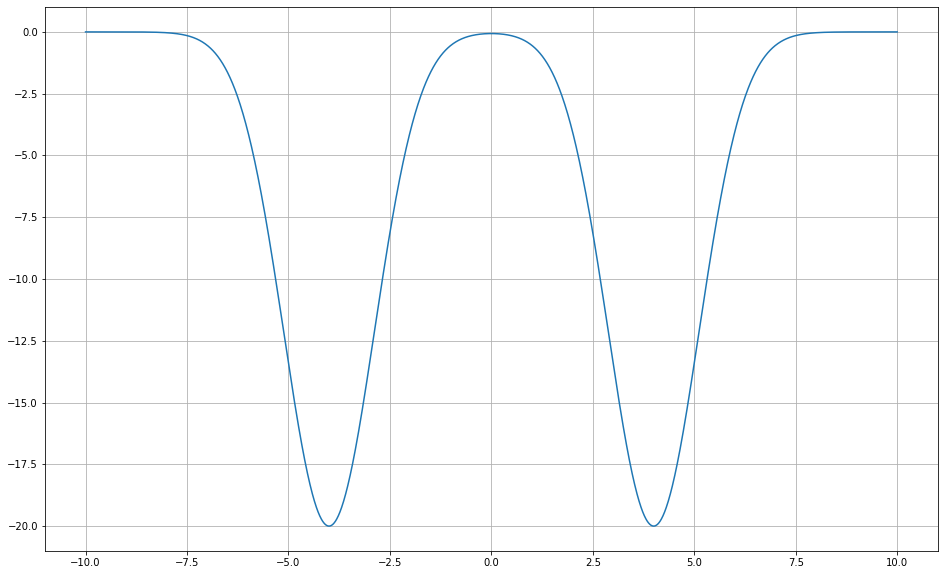

<IPython.core.display.Javascript object>

In [55]:
# Demonstration of a double-well using two s-Gaussians

k = 0
L = -4
R = 4
c = 0.4
weight = 20

well_l = G1D(k, c, L)
well_r = G1D(k, c, R)
potential = lambda x: -weight * (well_l(x) + well_r(x))

grid_length = 10
num_grid_points = 2001

grid = np.linspace(-grid_length, grid_length, num_grid_points)

fig = plt.figure(figsize=(16, 10))
plt.plot(grid, potential(grid))
plt.grid()
plt.show()

## Asymmetric double-well

To avoid degeneracy in the two wells we will introduce a slight Stark-shift in one of the well.
We will therefore use two $s$-Gaussians.
The Hamiltonian is on the form
\begin{align}
    \hat{h}
    = \hat{t} - w_L \text{exp}\!\left(-c x^2_L\right) - w_R \text{exp}\!\left(-c x^2_R\right),
\end{align}
where $w_L \neq w_R$ for the asymmetry.

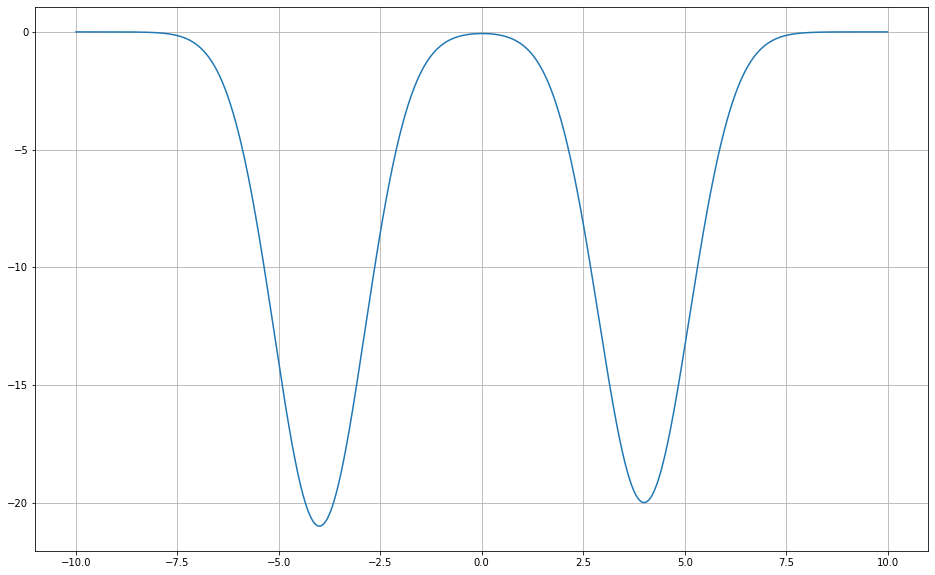

<IPython.core.display.Javascript object>

In [62]:
k = 0
L = -4
R = 4
c = 0.4
weight_l = 21
weight_r = 20

well_l = G1D(k, c, L)
well_r = G1D(k, c, R)
potential = lambda x: -weight_l * well_l(x) - weight_r * well_r(x)

grid_length = 10
num_grid_points = 2001

grid = np.linspace(-grid_length, grid_length, num_grid_points)

fig = plt.figure(figsize=(16, 10))
plt.plot(grid, potential(grid))
plt.grid()
plt.show()

### Setting up the finite differences basis set

In [63]:
l = 6

odqd = ODQD(l, grid_length, num_grid_points, potential=potential)

<IPython.core.display.Javascript object>

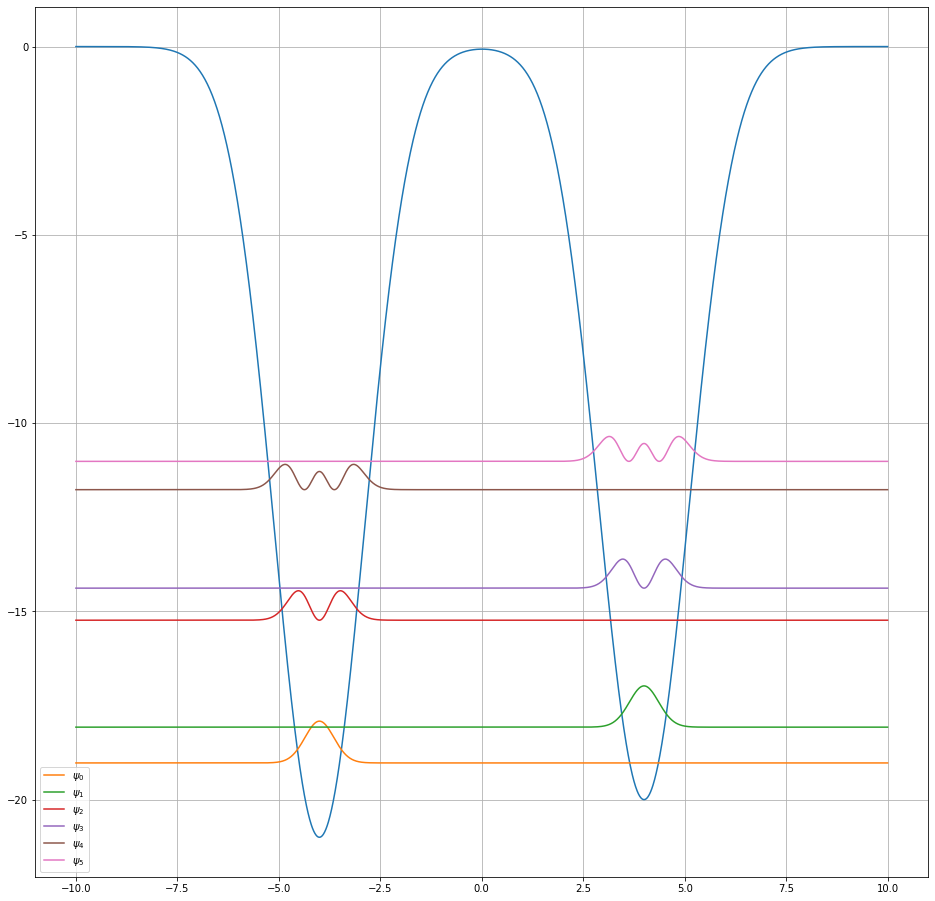

<IPython.core.display.Javascript object>

In [64]:
fig = plt.figure(figsize=(16, 16))

plt.plot(odqd.grid, potential(odqd.grid))

for i in range(odqd.l):
    plt.plot(
        odqd.grid,
        np.abs(odqd.spf[i]) ** 2 + odqd.h[i, i].real,
        label=r"$\psi_{" + f"{i}" + r"}$",
    )

plt.grid()
plt.legend()
plt.show()

In [65]:
print(np.diag(odqd.h).real)

[-19.0259301  -18.07532374 -15.23519883 -14.38357431 -11.76841814
 -11.01647275]


<IPython.core.display.Javascript object>

### Setting up the Gaussian basis set

In [78]:
gaussians = [G1D(i, np.sqrt(c), center) for center in [L, R] for i in range(l // 2)]

t = construct_kinetic_matrix_elements(gaussians)
s = construct_overlap_matrix_elements(gaussians)
v_l = weight_l * construct_gaussian_operator_matrix_elements(well_l, gaussians)
v_r = weight_r * construct_gaussian_operator_matrix_elements(well_r, gaussians)

bs = BasisSet(len(gaussians), dim=1)
bs.s = s
bs.h = t + v_l + v_r
bs.grid = grid
bs.u = np.zeros((bs.l, bs.l, bs.l, bs.l))
bs.spf = np.asarray([g(bs.grid, with_norm=True) for g in gaussians])

<IPython.core.display.Javascript object>

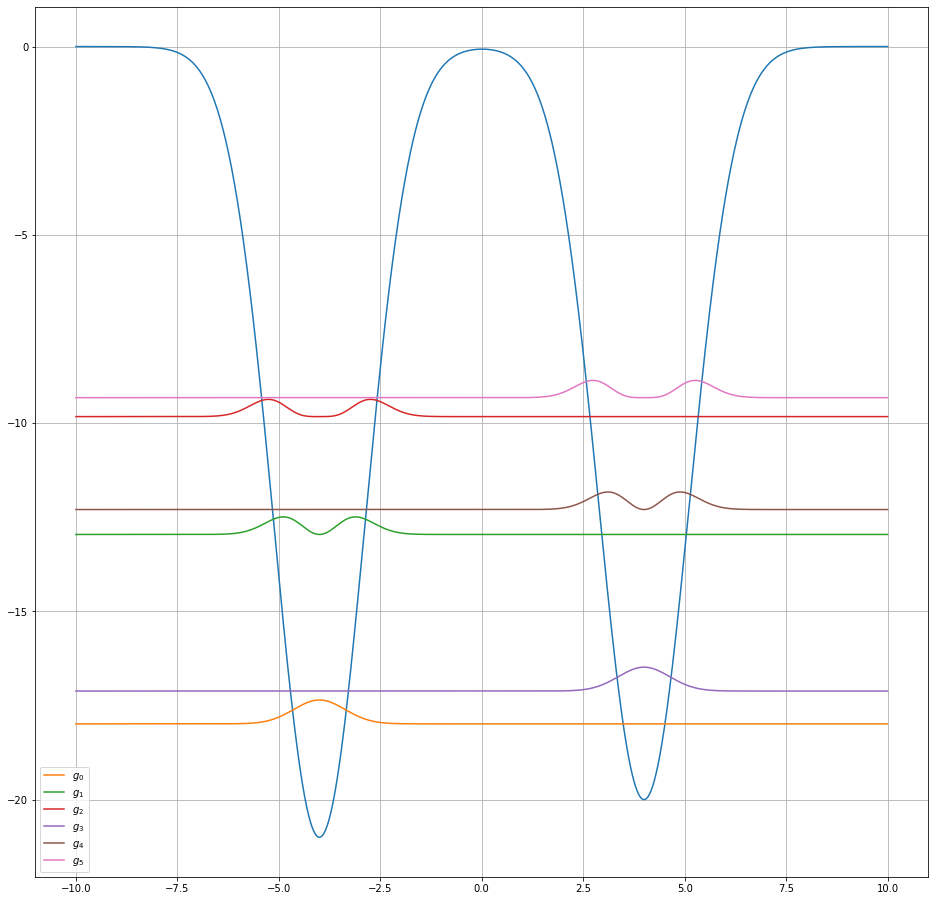

<IPython.core.display.Javascript object>

In [79]:
fig = plt.figure(figsize=(16, 16))

plt.plot(bs.grid, potential(bs.grid))

for i in range(bs.l):
    plt.plot(
        bs.grid,
        np.abs(bs.spf[i]) ** 2 + bs.h[i, i].real,
        label=r"$g_{" + f"{i}" + r"}$",
    )

plt.grid()
plt.legend()
plt.show()

In [82]:
print(np.diag(bs.h).real)

[-17.98809951 -12.95797367  -9.82767736 -17.11646488 -12.29575198
  -9.32455658]


<IPython.core.display.Javascript object>

### Diagonalized Gaussian basis

In [80]:
eps, C = scipy.linalg.eigh(bs.h, bs.s)

bs_2 = bs.copy_basis()
bs_2.change_basis(C)

<IPython.core.display.Javascript object>

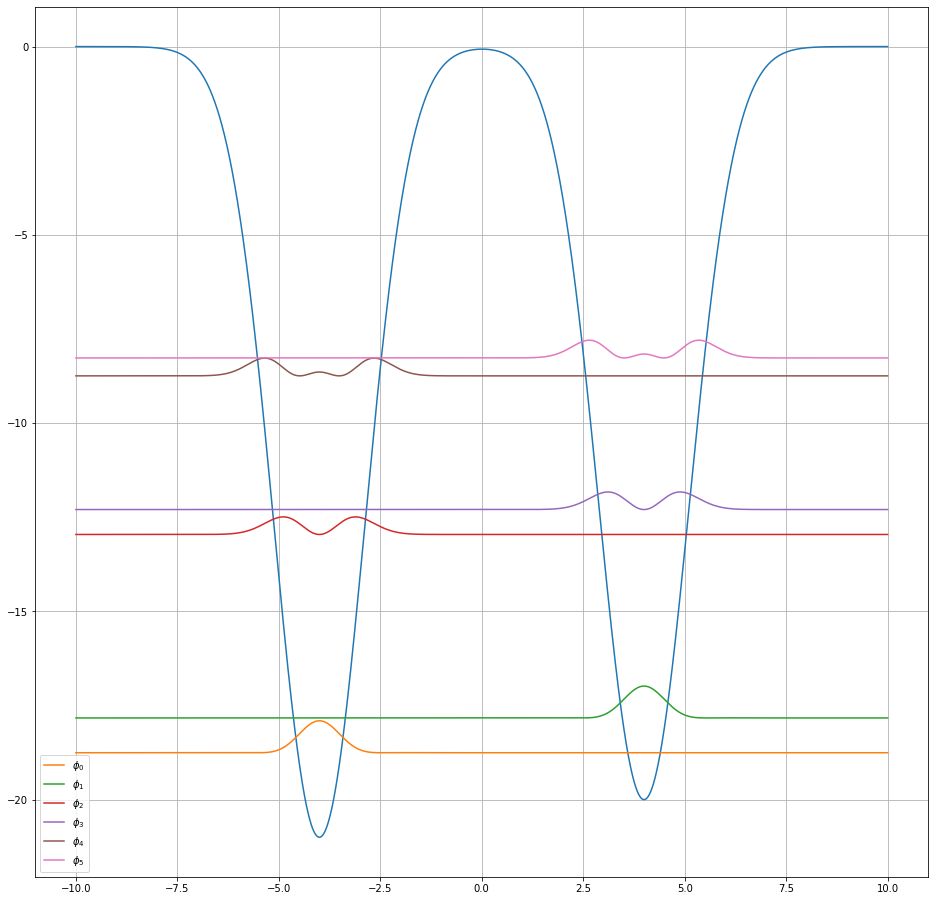

<IPython.core.display.Javascript object>

In [81]:
fig = plt.figure(figsize=(16, 16))

plt.plot(bs_2.grid, potential(bs_2.grid))

for i in range(bs_2.l):
    plt.plot(
        bs_2.grid,
        np.abs(bs_2.spf[i]) ** 2 + bs_2.h[i, i].real,
        label=r"$\phi_{" + f"{i}" + r"}$",
    )

plt.grid()
plt.legend()
plt.show()

In [84]:
print(np.diag(bs_2.h).real)

[-18.75504817 -17.83106903 -12.95797367 -12.29575198  -8.7457324
  -8.26980011]


<IPython.core.display.Javascript object>

### Comparison

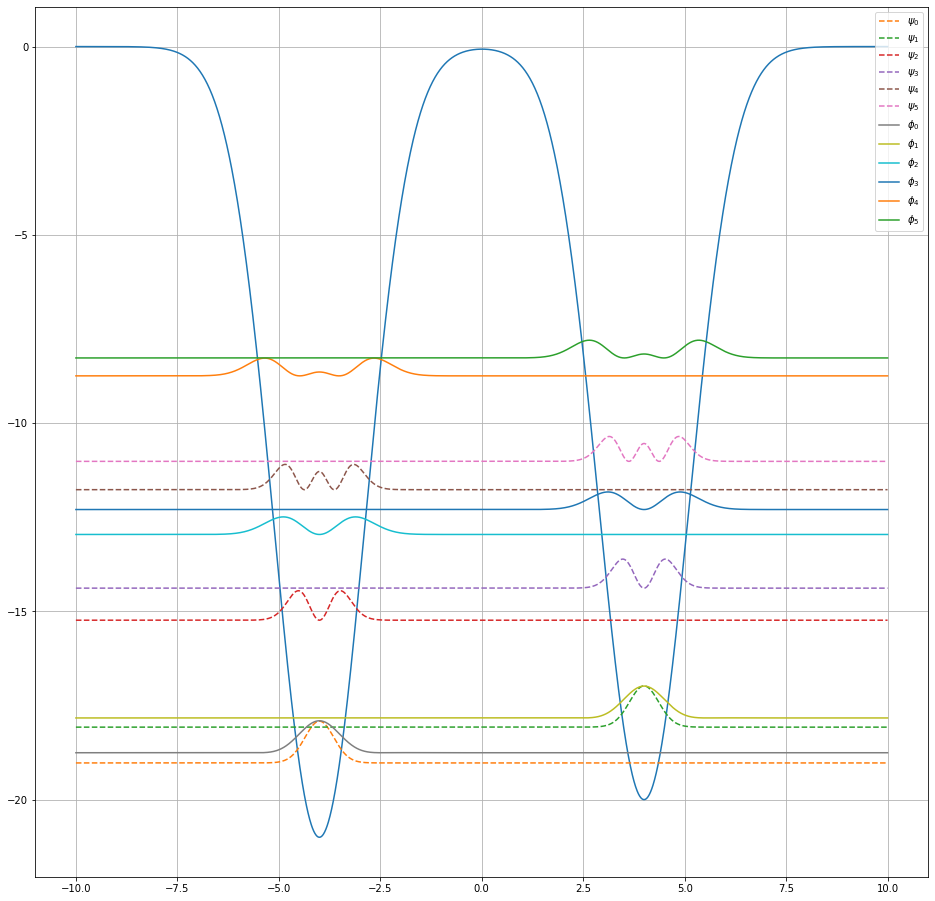

<IPython.core.display.Javascript object>

In [85]:
fig = plt.figure(figsize=(16, 16))

plt.plot(bs_2.grid, potential(bs_2.grid))

for i in range(odqd.l):
    plt.plot(
        odqd.grid,
        np.abs(odqd.spf[i]) ** 2 + odqd.h[i, i].real,
        "--",
        label=r"$\psi_{" + f"{i}" + r"}$",
    )

for i in range(bs_2.l):
    plt.plot(
        bs_2.grid,
        np.abs(bs_2.spf[i]) ** 2 + bs_2.h[i, i].real,
        label=r"$\phi_{" + f"{i}" + r"}$",
    )

plt.grid()
plt.legend()
plt.show()